# Example 3: Role of the IMF in the G-band magnitude distribution

**Asgaia ** allows to choose among three Initial Mass Functions (IMFs):

 * [Salpeter](http://adsabs.harvard.edu/abs/1955ApJ...121..161S) ('s').
 * [Kroupa](http://adsabs.harvard.edu/abs/2002Sci...295...82K) ('k').
 * [Bimodal](http://adsabs.harvard.edu/abs/1996ApJS..106..307V) ('b').

Those IMFs are selected by setting the input variable IMF_type = 's', 'k' or 'b' respectively

In [1]:
import numpy as np
import AsgaiaTools
import matplotlib.pyplot as plt

In [2]:
# Histogram options (feel free to edit them as you want):
Nbins = 64;
G_band_limits = [12., 20.]; # The standard for Gaia. WARNING: For G<3 or G>20 the limits will be redefined.
Interpolation = True; # Do you want to interpolate the isocrones?
# If True, the computation is four times slower, but in this example the number of particles is not very large.

In [3]:
# Name of the file of the particles
filename = 'Particle_list.dat';

In [4]:
# Read the file
A = np.genfromtxt(filename, comments='#',names=True);

In [5]:
#Extract the data
lon = A['lon_rad'];
lat = A['lat_rad'];
dkpc = A['dist_kpc'];
metZ = A['met_Z'];
logAge = A['logAge_yrs'];
mass = A['mass_Msun'];
del(A);

Now we make use of the function **AsgaiaTools.GetGaiaIMGhist()**, which returns three outputs:

1. The mean parallax error.
2. The estimated number of observed stars.
3. The extinction in the V band (A_V).
4. The histogram of the initial masses.
5. The histogram of the apparent G band magnitude.

In this exercise, we are only interested in the last output.

In [6]:
# First, use the Salpeter IMF:
im_hist_S = AsgaiaTools.GetGaiaIMGhist(lon, lat, dkpc, metZ, logAge, mass, IMF_type='s', \
                                     Cfactor=1.2, correction_flag=-1, \
                                     G_limits = G_band_limits, Nbins_G = Nbins)[4];

In [7]:
# Second, use the Kroupa IMF:
im_hist_K = AsgaiaTools.GetGaiaIMGhist(lon, lat, dkpc, metZ, logAge, mass, IMF_type='k',\
                                     G_limits = G_band_limits, Nbins_G = Nbins)[4]; # Unused options are now omitted

In [8]:
# Third, use the Bimodal IMF:
im_hist_B = AsgaiaTools.GetGaiaIMGhist(lon, lat, dkpc, metZ, logAge, mass, IMF_type='b',\
                                     G_limits = G_band_limits, Nbins_G = Nbins)[4]; # We are assuming IMF_slope = 2.35 (default value)

In [9]:
# The x-axis of the histograms is not created by AsgaiaTools:
Gband_axis = np.linspace(G_band_limits[0], G_band_limits[1],Nbins,endpoint = False);
width = Gband_axis[1]-Gband_axis[0];

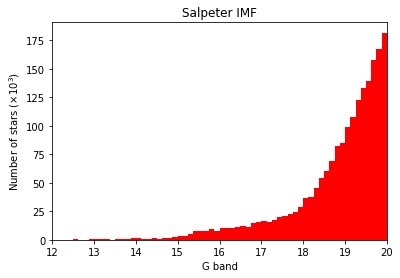

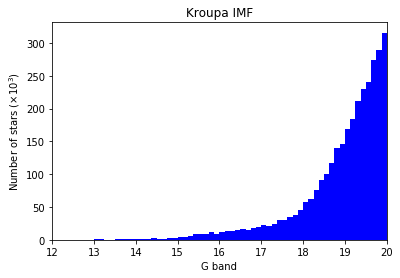

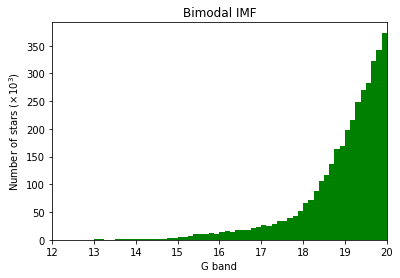

In [10]:
# First the Salpeter IMF
plt.figure('G band histograms (Salpeter)');
plt.title('Salpeter IMF');
plt.xlabel('G band');
plt.ylabel(r'Number of stars ($\times 10^3$)');
plt.bar(Gband_axis,im_hist_S*1E-3, width = width,fc = 'r', align='edge');
plt.xlim(G_band_limits);
plt.show()

# Second the Kroupa IMF
plt.figure('G band histograms (Kroupa)');
plt.title('Kroupa IMF');
plt.xlabel('G band');
plt.ylabel(r'Number of stars ($\times 10^3$)');
plt.bar(Gband_axis,im_hist_K*1E-3, width = width,fc = 'b', align='edge');
plt.xlim(G_band_limits);
plt.show()

# Third the Bimodal IMF
plt.figure('G band histograms (Bimodal)');
plt.title('Bimodal IMF');
plt.xlabel('G band');
plt.ylabel(r'Number of stars ($\times 10^3$)');
plt.bar(Gband_axis,im_hist_B*1E-3, width = width,fc = 'g', align='edge');
plt.xlim(G_band_limits);
plt.show()

In [11]:
#Now we compare the three distributions of G

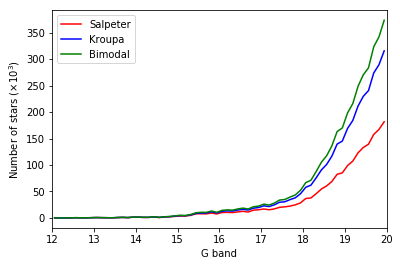

In [12]:
# Comparison
Gband_axis = Gband_axis + 0.5*width;
plt.figure('Comparison of the G band histograms');
plt.xlabel('G band');
plt.ylabel(r'Number of stars ($\times 10^3$)');
plt.plot(Gband_axis,im_hist_S*1E-3,'r');
plt.plot(Gband_axis,im_hist_K*1E-3,'b');
plt.plot(Gband_axis,im_hist_B*1E-3,'g');
plt.xlim(G_band_limits);
plt.legend(('Salpeter','Kroupa','Bimodal'));
plt.show()

In [ ]:
# End of Example3